# Introduction
***
Running a simmulation with SpatialPy requires only 2 components: a model (data), and a solver (algorithm).
***
### Setup the Environment
***
'os' and 'sys' allow us to modify the directory Python searches for source code. If you wish to use an installed SpatialPy package, you do not need to run this cell. If this notebook is being run from within the SpatialPy source code directory we need to let Python know that we want to use it, not the SpatialPy package.

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))

Import the types that'll be needed to define your Model.

In [2]:
import spatialpy

***
## Creating a SpatialPy Model
***
A SpatialPy model must include a domain, which may be fixed (not moving) or subject to fluid motion (SDPD method).
To add a biochemical network the model must also include Species, Parameters, Initial Conditions, and Reactions.

Your model is declared and configured as a Python class. As such, the name can be of your choosing. For this example we'll be modeling Spatial Birth and Death, so lets set the name accordingly.

In [3]:
def create_birth_death(parameter_values=None):
    # Intialize the Model with a name of your choosing.
    model = spatialpy.Model(name='Spatial Birth-Death')
    
    # Define Domain Type IDs as constants of the Model
    model.HABITAT = "Habitat"

    """
    A domain defines points and attributes of a regional space for simulation.

    Create a filled 2D domain
    - xlim: highest and lowest coordinate in the x dimension.
    - ylim: highest and lowest coordinate in the y dimension.
    - nx: number of particle spacing in the x dimension.
    - ny: number of particle spacing in the y dimension.
    - type_id: default type ID of particles to be created. Defaults to 1.
    - mass: default mass of particles to be created. Defaults to 1.0.
    - nu: default viscosity of particles to be created. Defaults to 1.0.
    - c: default artificial speed of sound of particles to be created. Defaults to 0.0.
    - rho: default density of particles to be created.
    - fixed: spatially fixed flag of particles to be created. Defaults to false.
    - rho0: Background density for the system.
    - c0: Speed of sound for the system.
    - P0: Background pressure for the system.
    - gravity: Acceleration of gravity for the system.
    """
    domain = spatialpy.Domain.create_2D_domain(
        xlim=(0, 1), ylim=(0, 1), nx=10, ny=10, type_id=model.HABITAT, fixed=True
    )

    # Set the Models Domain
    model.add_domain(domain)

    """
    Variables (SpatialPy.Species) can be anything that participates in or is produced by a reaction channel.

    - name: A user defined name for the species.
    - diffusion_coefficient: Non-constant coefficient of diffusion for the Species.
    - restrict_to: Restricts the movement of Species to  a type or list of types within the Domain.
    """
    Rabbits = spatialpy.Species(name='Rabbits', diffusion_coefficient=0.1)

    # Add the Variables to the Model.
    model.add_species(Rabbits)

    """
    Scatter the initial condition for a species randomly over the list of types.
    If the list of types is None scatter over all types.

    - species: The species to set the initial condition.
    - count: The initial condition for the target species.
    - types: Type IDs of the particles to place the initial condition.
    """
    init_rabbit_pop = spatialpy.ScatterInitialCondition(species='Rabbits', count=100)

    # Add Initial Conditions to the Model
    model.add_initial_condition(init_rabbit_pop)

    """
    Parameters are constant values relevant to the system, such as reaction kinetic rates.

    - name: A user defined name for reference.
    - expression: Some constant value.
    """
    kb = spatialpy.Parameter(name='k_birth', expression=10)
    kd = spatialpy.Parameter(name='k_death', expression=0.1)

    # Add the Parameters to the Model.
    model.add_parameter([kb, kd])

    """
    Reactions are the reaction channels which cause the system to change over time.

    - name: A user defined name for the reaction.
    - reactants: A dictionary with participant reactants as keys, and consumed per reaction as value.
    - products: A dictionary with reaction products as keys, and number formed per reaction as value.
    - rate: A parameter rate constant to be applied to the propensity of this reaction firing.
    - propensity_function: Can be used instead of rate in order to declare a custom propensity function
                           in string format.
    - restrict_to: Restrict reaction channels to a type or list of types within the Domain.
    """
    birth = spatialpy.Reaction(
        name='birth',
        reactants={},
        products={"Rabbits":1},
        rate="k_birth"
    )

    death = spatialpy.Reaction(
        name='death',
        reactants={"Rabbits":1},
        products={},
        rate="k_death"
    )

    # Add the Reactions to the Model.
    model.add_reaction([birth, death])

    # Define the Timespan of the Model
    tspan = spatialpy.TimeSpan.linspace(t=10, num_points=11, timestep_size=1)
    
    # Set the Timespan of the Model
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = create_birth_death()

***
## Running the Simulation
***
Run a spatial stochastic simulation on the Model and store the results in the 'results' variable.

In [5]:
results = model.run()

### You can find a thorough list of `model.run()` arguments in the [documentation](https://stochss.github.io/SpatialPy/docs/build/html/classes/spatialpy.core.html#spatialpy.core.model.Model.run) to customize the behavior of your simulations."
***
## Visualizations
***
Plot the results of the simulation.

There are a multitude of arguments that can be set to tweak the behavior and visuals of the plot. 
For now though, lets plot the populations of `Rabbits` at the end of the simulation using MatPlotLib.

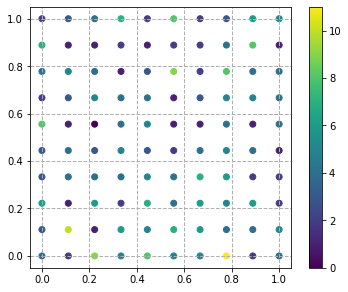

In [6]:
results.plot_species(
    # Set the target species to visualize
    species='Rabbits',
    
    # Set the time value to visualize (t_val defaults the 0)
    t_val=10,
    
    # Set to True to use MatPlotLib plotting
    use_matplotlib=True
)

That plot is somewhat boring though, so lets plot the populations of `Rabbits` over time using Plotly anumation.

In [7]:
results.plot_species(
    # Set the target species to visualize
    species='Rabbits',
    
    # Set to True to use Plotly animation
    animated=True,
    
    # Set the size of the Particles
    size=20
)

### A more complete list of `results.plot_species()` arguments can be found in the [documentation](https://stochss.github.io/SpatialPy/docs/build/html/classes/spatialpy.core.html#spatialpy.core.result.Result.plot_species).
***
## Where to go now?
***
For a more advanced example on reaction diffusion follow the link below:

- [3D Cylinder Demo](./3D_Cylinder_Demo.ipynb)

For examples on Fluid Dynamic models follow the links below:

- [Gravity](./Gravity.ipynb)
- [Weir](./weir.ipynb)